In [2]:
# load libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
from sklearn.ensemble import AdaBoostClassifier

In [5]:
# the Credit Card Approval Prediction dataset
# read the dataset and show the first 7 rows
df_application = pd.read_csv(r'C:\Users\Katerina\Desktop\Dimokritos\Machine Learning - αναστασια Κριθαρα\2nd krit ergasia\application_record.csv')
df_application.head(7)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   
5  5008810           F            N               Y             0   
6  5008811           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   
5          270000.0  Commercial associate  Secondary / secondary special   
6          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   
5  Single / not married  House / apartment      -19110          -3051   
6  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   
5           1                0           1           1     Sales staff   
6           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0  
5              1.0  
6              1.0

In [7]:
# run the second dataset 
df_credit = pd.read_csv(r"C:\Users\Katerina\Desktop\Dimokritos\Machine Learning - αναστασια Κριθαρα\2nd krit ergasia\credit_record.csv")
df_credit.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [8]:
# i merged the 2 datasets
df = pd.merge(df_application, df_credit, how='inner', on=['ID'])
df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005          -4542           1                1   
1  Rented apartment      -12005          -4542           1                1   
2  Rented apartment      -12005          -4542           1                1   
3  Rented apartment      -12005          -4542           1                1   
4  Rented apartment      -12005          -4542           1                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0             NaN              2.0               0   
1           0           0             NaN              2.0              -1   
2           0           0             NaN              2.0              -2   
3           0           0             NaN              2.0              -3   
4           0           0             NaN              2.0              -4   

  STATUS  
0      C  
1      C  
2      C  
3      C  
4      C

In [7]:
#Data cleaning is needed in this dataset.  
df.drop(labels = ['FLAG_MOBIL', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 'FLAG_OWN_CAR', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'MONTHS_BALANCE', 'CNT_FAM_MEMBERS' ], axis=1, inplace = True)

In [12]:
# Exploratory Analysis
#df.shape # The dimensions of the data are: 438557 rows and 18 columns/features
#df.dtypes # type of each feature
#df.describe() # statistical summary of all attributes like mean,std, min,max, quarters
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_REALTY      777715 non-null  object 
 3   CNT_CHILDREN         777715 non-null  int64  
 4   AMT_INCOME_TOTAL     777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  object 
 6   NAME_EDUCATION_TYPE  777715 non-null  object 
 7   NAME_FAMILY_STATUS   777715 non-null  object 
 8   NAME_HOUSING_TYPE    777715 non-null  object 
 9   DAYS_BIRTH           777715 non-null  int64  
 10  DAYS_EMPLOYED        777715 non-null  int64  
 11  STATUS               777715 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 77.1+ MB


In [8]:
# the last feature had both numerical values and letters
# bear in mind that the last feature is our Y/outcome/class
# So C and X became the "0" class and the numerical values the '1' class 
df['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
df['STATUS'] = df['STATUS'].astype('int')
df['STATUS'] = df['STATUS'].apply(lambda x:0 if x >= 2 else 1)
df.tail()

ID CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
777710  5150337           M               Y             0          112500.0   
777711  5150337           M               Y             0          112500.0   
777712  5150337           M               Y             0          112500.0   
777713  5150337           M               Y             0          112500.0   
777714  5150337           M               Y             0          112500.0   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
777710          Working  Secondary / secondary special  Single / not married   
777711          Working  Secondary / secondary special  Single / not married   
777712          Working  Secondary / secondary special  Single / not married   
777713          Working  Secondary / secondary special  Single / not married   
777714          Working  Secondary / secondary special  Single / not married   

       NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  STATUS  
777710  Rented apartment       -9188          -1193       1  
777711  Rented apartment       -9188          -1193       0  
777712  Rented apartment       -9188          -1193       1  
777713  Rented apartment       -9188          -1193       1  
777714  Rented apartment       -9188          -1193       1

In [14]:
# checking which columns have string values
only_object = pd.DataFrame(df.dtypes =='object').reset_index()
object_type = only_object[only_object[0] == True]['index']
object_type

1            CODE_GENDER
2        FLAG_OWN_REALTY
5       NAME_INCOME_TYPE
6    NAME_EDUCATION_TYPE
7     NAME_FAMILY_STATUS
8      NAME_HOUSING_TYPE
Name: index, dtype: object

In [9]:
# transforming all strings to floats 
le = LabelEncoder()
for x in df:
    if df[x].dtypes=='object':
        df[x] = le.fit_transform(df[x])
df.head()

ID  CODE_GENDER  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0  5008804            1                1             0          427500.0   
1  5008804            1                1             0          427500.0   
2  5008804            1                1             0          427500.0   
3  5008804            1                1             0          427500.0   
4  5008804            1                1             0          427500.0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 4                    1                   0   
1                 4                    1                   0   
2                 4                    1                   0   
3                 4                    1                   0   
4                 4                    1                   0   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  STATUS  
0                  4      -12005          -4542       1  
1                  4      -12005          -4542       1  
2                  4      -12005          -4542       1  
3                  4      -12005          -4542       1  
4                  4      -12005          -4542       1

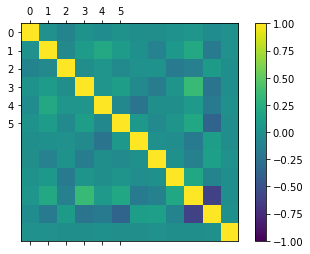

In [16]:
#Multivariate plot to better understand relationships between attributes
#correlations
correlations = df.corr() 
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [9]:
# we create the test train split
array = df.values
X = array[:,0:11]
Y = array[:,11]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)


In [16]:
# undersampling with Nearmiss 3
X, Y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(Y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X, Y = undersample.fit_resample(X, Y)
# summarize the new class distribution
counter = Counter(Y)
print(counter)

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


In [17]:
# Rescaling of data
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarise transformed data
#set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 2.25666782  1.90527466]
 [ 2.20208933  1.80241678]
 [ 1.92535559  1.62315585]
 [-0.69064999 -2.03074334]
 [-0.12518759 -1.62744755]]


In [18]:
# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
# The scoring function to use
scoring = 'accuracy'
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

 LR: 0.700000 (+/- 0.059161)
LDA: 0.710000 (+/- 0.062450)
kNN: 0.690000 (+/- 0.101980)
 DT: 0.575000 (+/- 0.071589)
 NB: 0.660000 (+/- 0.053852)


In [19]:
#Tune the hyperparameters
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv=5)
grid.fit(X, Y)
# print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.024561112338217516
1.0


In [23]:
# Boosting our estimation with ADABOOST 
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.645


In [27]:
# RFE should be used after Data cleaning
# Feature Extraction with RFE in order to help us have less computational cost. 
model = LogisticRegression(solver="liblinear")
rfe = RFE(model)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("")
for X,Y in zip(names, fit.support_):
    print("Feature: "+x+" selected: ",Y)

Num Features: 1
Selected Features: [False  True]
Feature Ranking: [2 1]

Feature: STATUS selected:  False
Feature: STATUS selected:  True
